## Differentially Private Logistic Regression Based on Noisy Gradient Descent

### Packages

In [1006]:
import numpy as np
import matplotlib.pyplot as plt
from Func import *
import copy
import math
from numpy import linalg as LA

### Load Training Data

In [1007]:
X_train, y_train = load_data("data")
m,n = X_train.shape

### DP Parameters

In [1008]:
l2norm=np.zeros(m)
for i in range(m):
    l2norm[i]=LA.norm(X_train[i],2)

In [1009]:
G_MAX=np.amax(l2norm)
G_MAX

130.69430282869368

In [1010]:
epsilon=1
delta=0.00001
T=1000
sigma_w=(2*G_MAX/m)*np.sqrt(2*T*np.log(1/delta))*(1/epsilon)
sigma_b=(2*1/m)*np.sqrt(2*T*np.log(1/delta))*(1/epsilon)
mu=0

### Plot training data

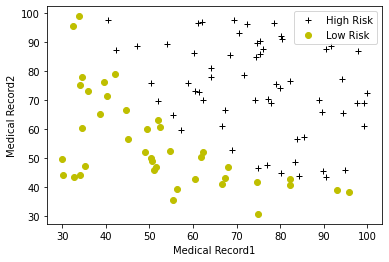

In [1011]:
plot_data(X_train, y_train, pos_label="High Risk", neg_label="Low Risk")
plt.ylabel('Medical Record2') 
plt.xlabel('Medical Record1') 
plt.legend(loc="upper right")
plt.show()

### Sigmoid Function

In [1012]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

### Cost Function

In [1013]:
def compute_cost(X, y, w, b, lambda_= 1):
   
    m,n = X_train.shape
    loss_sum = 0
    z_wb = 0

    for i in range(m): 
        
        z_wb = np.dot(X[i],w)
        z_wb += b 
        f_wb= sigmoid(z_wb);
        loss = -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb);
        loss_sum += loss 

    total_cost = (1 / m) * loss_sum 


    return total_cost

### Compute Gradient

In [1014]:
def compute_gradient(X, y, w, b, lambda_=None): 
   
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    
    for i in range(m):
        z_wb = 0
 
        for j in range(n):
            z_wb_ij = w[j]*X[i][j];
            z_wb += z_wb_ij
            
        z_wb += b
        f_wb = sigmoid(z_wb);
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        
        
        for j in range(n):
            dj_dw_ij = (f_wb - y[i])* X[i][j]
            dj_dw[j] += dj_dw_ij
            
    dj_dw = dj_dw / m+ np.random.normal(mu, sigma_w)/m
    dj_db = dj_db / m+ np.random.normal(mu, sigma_b)/m
 
    return dj_db, dj_dw


### Gradient Descent

In [1015]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    m = len(X)
   
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        if i<100000:     
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

        
    return w_in, b_in, J_history, w_history 

### Learning The Parameters

In [1016]:
np.random.seed(1)
initial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8

iterations = T
alpha = 0.001
w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b,compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.84   
Iteration  100: Cost     0.31   
Iteration  200: Cost     0.31   
Iteration  300: Cost     0.32   
Iteration  400: Cost     0.35   
Iteration  500: Cost     0.31   
Iteration  600: Cost     0.31   
Iteration  700: Cost     0.31   
Iteration  800: Cost     0.31   
Iteration  900: Cost     0.31   
Iteration  999: Cost     0.31   


In [1017]:
w

array([[0.06862752],
       [0.06181485]])

In [1018]:
b

array([-8.01815719])

## Plot Decision Boundary

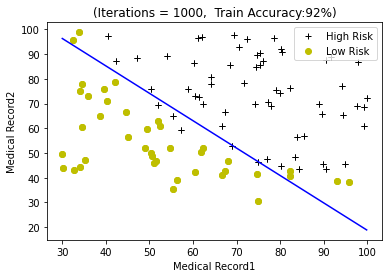

In [1019]:
plot_data(X_train, y_train, pos_label="High Risk", neg_label="Low Risk")


plt.ylabel('Medical Record2') 

plt.xlabel('Medical Record1') 
plt.legend(loc="upper right")



plt.title("(Iterations = 1000,  Train Accuracy:92%)")

plot_decision_boundary(w, b, X_train, y_train)

#$\epsilon$=10

### Predict Function

In [1020]:
def predict(X, w, b): 
    
   
    m, n = X.shape   
    p = np.zeros(m)
   
    for i in range(m):   
        z_wb = 0
    
        for j in range(n): 
            z_wb_ij = w[j]*X[i][j]
        
            
            z_wb += z_wb_ij
        
     
        z_wb += b
        
        
        f_wb = sigmoid(z_wb)

       
        p[i] = f_wb >= 0.5
        
 
    return p

### Copute Accuracy

In [1021]:

p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 90.000000


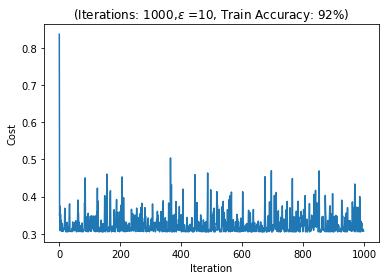

In [1022]:
itr=range(T)
plt.ylabel('Cost') 
plt.xlabel('Iteration') 
plt.title("(Iterations: 1000,$\epsilon$ =10, Train Accuracy: 92%)")
plt.plot(itr,J_history) 

### Application

In [1023]:
X=np.array([[60,80]])
predict(X,w,b)

array([1.])